In [11]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

warnings.filterwarnings("ignore", category=DeprecationWarning) 
tf.random.set_seed(221)
np.random.seed(221)

In [12]:
val_accuracies = []
train_accuracies = []

In [13]:
def buildModel(neurons = 32, input_shape = (15,1)):
  model = Sequential()
  model.add(LSTM(neurons, input_shape=input_shape))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def printMetrics(model, x, y, stage):
  scores = model.evaluate(x, y, verbose=0)
  print("(" + stage + ")" + "Erro da LSTM : %.2f%%" % (100-scores[1]*100))
  print("(" + stage + ")" + "Acurária da LSTM  %.2f%%" % (scores[1]*100))
  print("\n")

  if(stage == "TESTE"):
    val_accuracies.append(scores[1])
  else:
    train_accuracies.append(scores[1])

  if(stage == "TESTE"):
    print("Matriz de confusão (" + stage + ")")
    y_pred = model.predict(x, verbose = 0)
    y_pred = np.array(np.round(y_pred))
    y = np.array(y)
    cf_matrix = confusion_matrix(y, y_pred, normalize='true')

    print("Precision, recall e f1-score")
    print(classification_report(y, y_pred)) 
    print(cf_matrix[0][0], "Previu COMPRA e era COMPRA")
    print(cf_matrix[0][1], "Previu COMPRA e era VENDA")  
    print(cf_matrix[1][0], "Previu VENDA e era COMPRA")
    print(cf_matrix[1][1], "Previu VENDA e era VENDA")
  
    fig, ax = plt.subplots(figsize=(4, 4))

    cf_matrix = confusion_matrix(y, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)

    disp.plot(ax = ax)
    plt.show()

def getData(action, training = False, dropDays=0):
  step = "treino" if training else "teste"
  df = pd.read_csv("./" + action + "./" + step + ".csv")
  df.drop(columns=["Unnamed: 0", "Smoothed_Close", "Close", "Date"], inplace=True)

  if(dropDays > 0):
    columns_to_drop = []
    for day in reversed(range(dropDays)):
      columns_to_drop.append("Past_" + str(15-day)+ "_Days_Close")
    df.drop(columns=columns_to_drop, inplace=True)

  x = df.drop(columns=["Label"])
  y = df["Label"]

  scaler = MinMaxScaler(feature_range=(0, 1))
  x = scaler.fit_transform(x)
  y = y.replace(-1, 0)
  
  x = np.reshape(x, (x.shape[0], x.shape[1], 1))
  return x, y

In [14]:
action = "BBAS3.SA"
x_train, y_train = getData(action=action, training=True)
x_test, y_test = getData(action=action, training=False)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4735, 15, 1)
(4735,)
(1185, 15, 1)
(1185,)


Treinando modelo para a ação: BBAS3.SA


c:\Users\verdant\Desktop\TCC-Deep-Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(TREINO)Erro da LSTM : 21.14%
(TREINO)Acurária da LSTM  78.86%


(TESTE)Erro da LSTM : 28.35%
(TESTE)Acurária da LSTM  71.65%


Matriz de confusão (TESTE)
Precision, recall e f1-score
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       689
           1       0.76      0.48      0.58       496

    accuracy                           0.72      1185
   macro avg       0.73      0.68      0.68      1185
weighted avg       0.72      0.72      0.70      1185

0.8896952104499274 Previu COMPRA e era COMPRA
0.11030478955007257 Previu COMPRA e era VENDA
0.5241935483870968 Previu VENDA e era COMPRA
0.47580645161290325 Previu VENDA e era VENDA


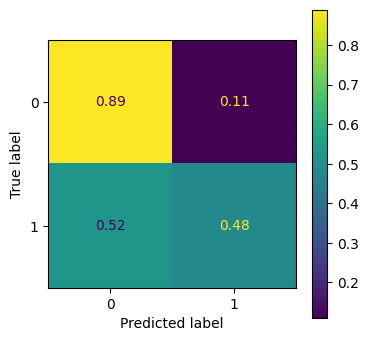



--------------------------------------------#################------------------------------------------------------


Treinando modelo para a ação: CSNA3.SA


c:\Users\verdant\Desktop\TCC-Deep-Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(TREINO)Erro da LSTM : 12.90%
(TREINO)Acurária da LSTM  87.10%


(TESTE)Erro da LSTM : 14.08%
(TESTE)Acurária da LSTM  85.92%


Matriz de confusão (TESTE)
Precision, recall e f1-score
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       688
           1       0.77      0.96      0.85       498

    accuracy                           0.86      1186
   macro avg       0.86      0.87      0.86      1186
weighted avg       0.88      0.86      0.86      1186

0.7892441860465116 Previu COMPRA e era COMPRA
0.21075581395348839 Previu COMPRA e era VENDA
0.04417670682730924 Previu VENDA e era COMPRA
0.9558232931726908 Previu VENDA e era VENDA


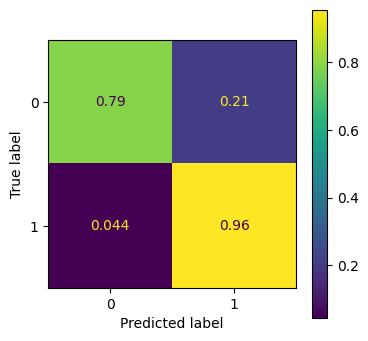



--------------------------------------------#################------------------------------------------------------


Treinando modelo para a ação: PETR4.SA


c:\Users\verdant\Desktop\TCC-Deep-Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(TREINO)Erro da LSTM : 18.12%
(TREINO)Acurária da LSTM  81.88%


(TESTE)Erro da LSTM : 20.28%
(TESTE)Acurária da LSTM  79.72%


Matriz de confusão (TESTE)
Precision, recall e f1-score
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       581
           1       0.83      0.76      0.79       622

    accuracy                           0.80      1203
   macro avg       0.80      0.80      0.80      1203
weighted avg       0.80      0.80      0.80      1203

0.8364888123924269 Previu COMPRA e era COMPRA
0.16351118760757316 Previu COMPRA e era VENDA
0.2395498392282958 Previu VENDA e era COMPRA
0.7604501607717041 Previu VENDA e era VENDA


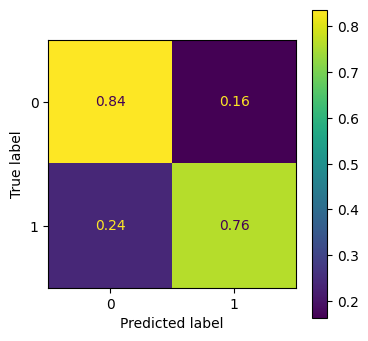



--------------------------------------------#################------------------------------------------------------


Treinando modelo para a ação: VALE3.SA


c:\Users\verdant\Desktop\TCC-Deep-Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(TREINO)Erro da LSTM : 20.74%
(TREINO)Acurária da LSTM  79.26%


(TESTE)Erro da LSTM : 20.78%
(TESTE)Acurária da LSTM  79.22%


Matriz de confusão (TESTE)
Precision, recall e f1-score
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       601
           1       0.83      0.73      0.78       602

    accuracy                           0.79      1203
   macro avg       0.80      0.79      0.79      1203
weighted avg       0.80      0.79      0.79      1203

0.8552412645590682 Previu COMPRA e era COMPRA
0.1447587354409318 Previu COMPRA e era VENDA
0.2707641196013289 Previu VENDA e era COMPRA
0.729235880398671 Previu VENDA e era VENDA


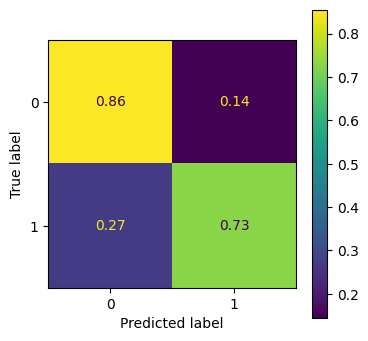



--------------------------------------------#################------------------------------------------------------




In [15]:
actions = ["BBAS3.SA", "CSNA3.SA", "PETR4.SA", "VALE3.SA"]


for action in actions:
  x_train, y_train = getData(action=action, training=True)
  x_test, y_test = getData(action=action, training=False)

  model = buildModel()
  print("Treinando modelo para a ação:", action)
  history = model.fit(x_train, y_train, validation_split = 0.2, epochs=100, batch_size=10, verbose=0)
  printMetrics(model, x_train, y_train, "TREINO")
  printMetrics(model, x_test, y_test, "TESTE")

  model.save(f"./models/lstm/{action}_model.h5")

  print("\n")
  print("--------------------------------------------#################------------------------------------------------------")
  print("\n")
  

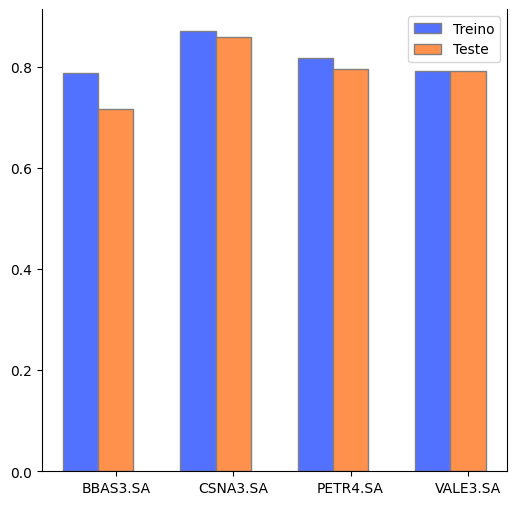

In [16]:
barWidth = 0.30
fig, ax= plt.subplots(figsize =(6, 6)) 

br1 = np.arange(4) 
br2 = [x + barWidth for x in br1] 
 
ax.spines['top'].set_visible(False)

plt.bar(br1, train_accuracies, color ='#5271FF', width = barWidth, 
        edgecolor ='grey', label ='Treino') 
plt.bar(br2, val_accuracies, color ='#FF914D', width = barWidth, 
        edgecolor ='grey', label ='Teste') 

plt.xticks([r + barWidth for r in range(4)], ["BBAS3.SA","CSNA3.SA","PETR4.SA","VALE3.SA"])
 
plt.legend()
plt.show() 

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("./backtest/BBAS3.SA.csv")
df.drop(columns=["Date", "Open"], inplace=True)

df.head(5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = df.drop(columns=["Close"])
y = df["Close"]

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
y = y.replace(-1, 0)

x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [ ]:
from keras.saving import load_model
loaded_model = load_model("./models/lstm/BBAS3.SA_model.h5")
y_pred = loaded_model.predict(x, verbose = 0)
y_pred = np.array(np.round(y_pred))

In [ ]:
df = pd.read_csv("./backtest/BBAS3.SA.csv")

In [ ]:
# Backtest usando os dados do ano de 2024 (o modelo é treinado com dados de até 2023)
quotes = 20
balance = 0
lucros = 0

for index, row in df.iterrows():
  date = row.values[0] 
  day_open = float(row.values[1])
  close = float(row.values[2])
  
  print(f"Saldo atual ({date}) : {round(balance, 2)}, ação abriu em {day_open}")
  
  order_text = "Compra" if y_pred[index] == 1 else "Venda"

  print(f"Saldo da ação: {round(close-day_open, 2)}")
  
  if(order_text == "Compra" and close > day_open):
    balance+=  abs(close - day_open) * quotes
  if(order_text == "Compra" and close < day_open):
    balance+=  -(day_open - close) * quotes
  if(order_text == "Venda" and close > day_open):
    balance+=  -(day_open - close) * quotes
  if(order_text == "Venda" and close < day_open):
    balance+=  abs(close - day_open) * quotes
    
  print(f"{order_text} efetuada, dia finalizado com lucro de {round(balance,2)}, ação fechou em {close}")

  print("\n")

print(f"Saldo final: {balance}")

In [ ]:
actions = ["BBAS3.SA", "CSNA3.SA", "PETR4.SA", "VALE3.SA"]

for action in actions:
  df = pd.read_csv(f"./backtest/{action}.csv")
  df.drop(columns=["Date", "Open"], inplace=True)

  x = df.drop(columns=["Close"])
  y = df["Close"]

  scaler = MinMaxScaler(feature_range=(0, 1))
  x = scaler.fit_transform(x)
  y = y.replace(-1, 0)
  x = np.reshape(x, (x.shape[0], x.shape[1], 1))

  loaded_model = load_model(f"./models/lstm/{action}_model.h5")
  y_pred = loaded_model.predict(x, verbose = 0)
  y_pred = np.array(np.round(y_pred))

  df = pd.read_csv(f"./backtest/{action}.csv")

  quotes = 20
  balance = 0

  for index, row in df.iterrows():
    date = row.values[0] 
    day_open = float(row.values[1])
    close = float(row.values[2])
    
    order_text = "Compra" if y_pred[index] == 1 else "Venda"
    
    if(order_text == "Compra" and close > day_open):
      balance+=  abs(close - day_open) * quotes
    if(order_text == "Compra" and close < day_open):
      balance+=  -(day_open - close) * quotes
    if(order_text == "Venda" and close > day_open):
      balance+=  -(day_open - close) * quotes
    if(order_text == "Venda" and close < day_open):
      balance+=  abs(close - day_open) * quotes
      

  print(f"Saldo final: {balance} para a ação {action}")